In [3]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Ml Project/data (1).csv")

In [5]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
#Finding the duplicate values
df[df.duplicated()].count()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

we can find that there are no duplicate rows from the above observation

In [8]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


<Axes: >

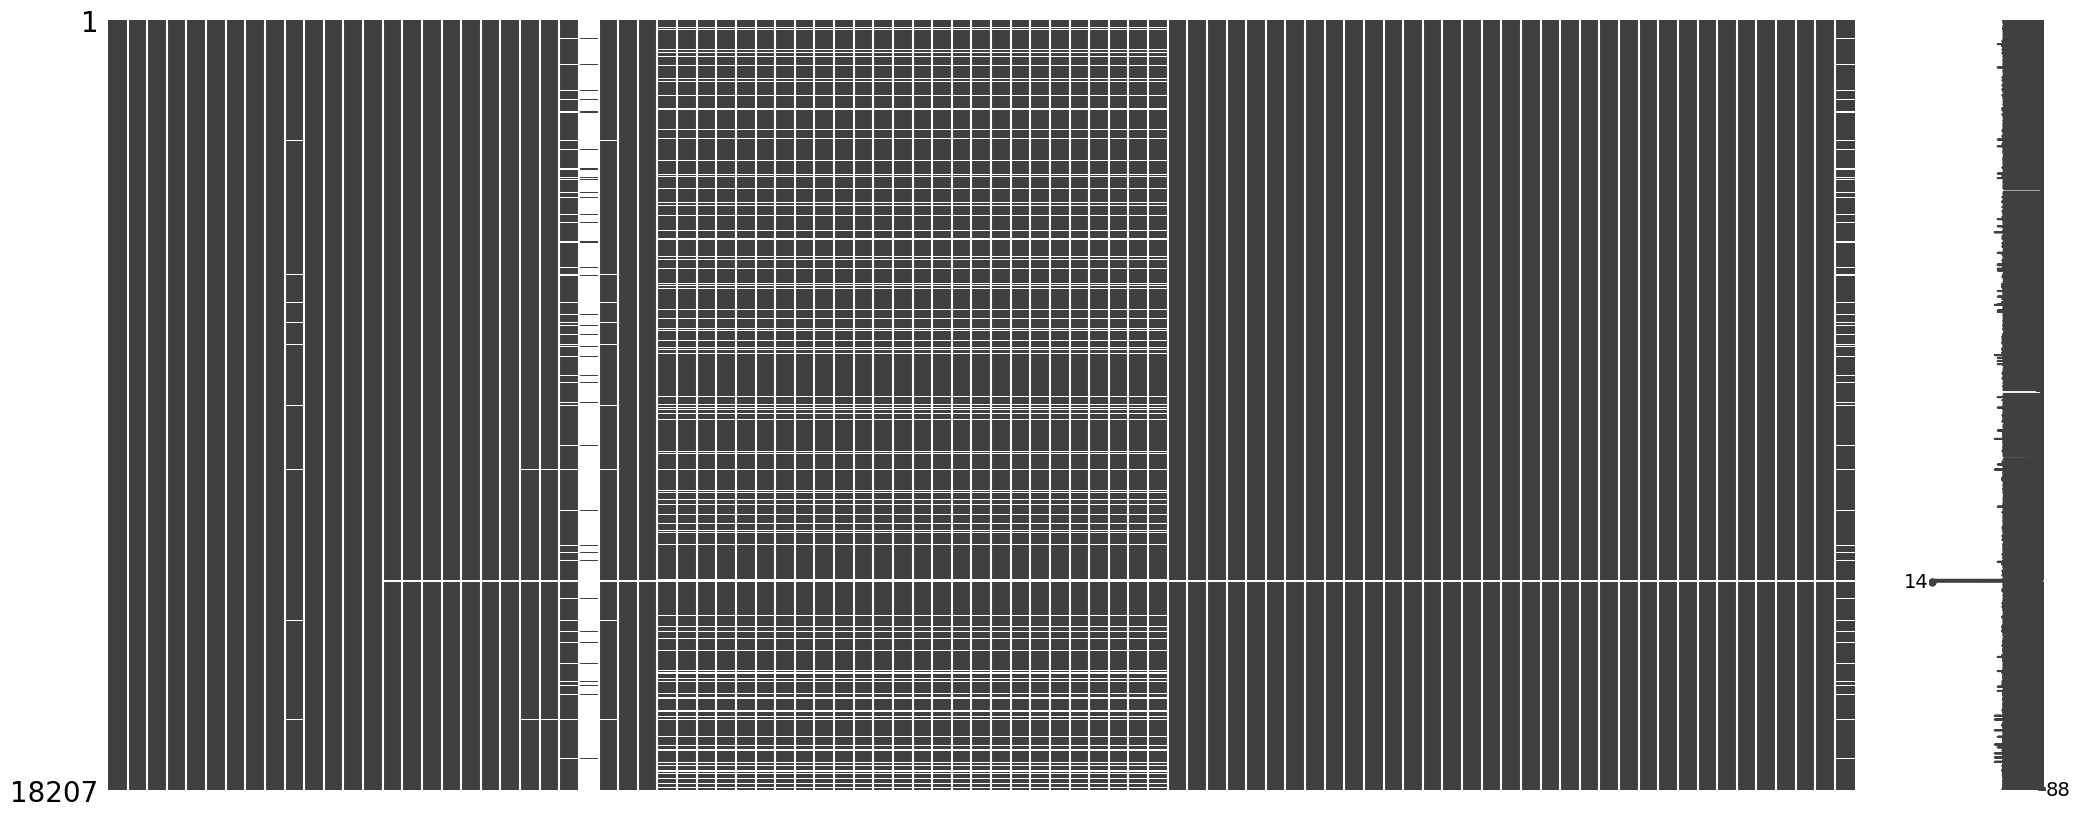

In [9]:
msn.matrix(df)

Data Cleaning

In [10]:
#Drop unnamed 0 column
Drop_col = 'Unnamed: 0'
df.drop(Drop_col, axis=1, inplace=True)

In [11]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [12]:
# Fill NaN values with mode for each column
df = df.fillna(df.mode().iloc[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      18207 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18207 non-null  object 
 14  Intern

In [14]:
# Preprocess height column
# Convert data from format xx'xx to xx.xx
df['Height'] = df['Height'].str.replace("'", ".").astype(float)

# Remove "nan" values with Mode and convert the column to numerical
height_mode = df['Height'].mode()[0]
df['Height'].fillna(height_mode, inplace=True)
df['Height'] = df['Height'].astype(float)

# Preprocess weight column
# Convert data from format xxlbs to xx
df['Weight'] = df['Weight'].str.replace("lbs", "").astype(float)

# Remove "nan" values with Mode and convert the column to numerical
weight_mode = df['Weight'].mode()[0]
df['Weight'].fillna(weight_mode, inplace=True)
df['Weight'] = df['Weight'].astype(float)

# Now, the 'Height' and 'Weight' columns are preprocessed and in numerical format


In [15]:
df["Weight"].info

<bound method Series.info of 0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64>

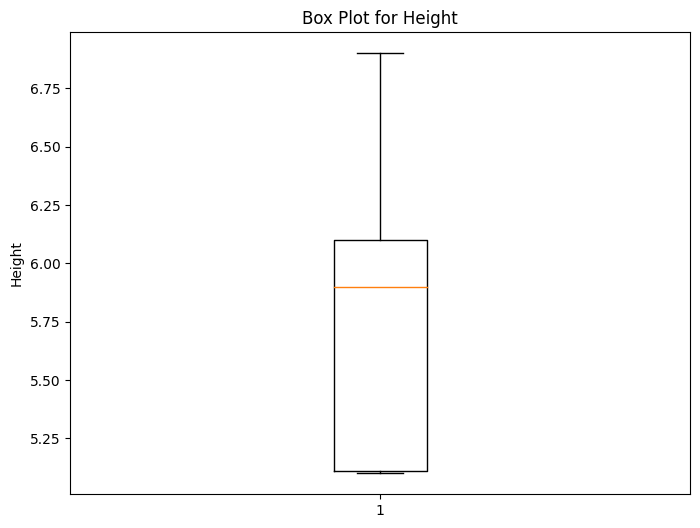

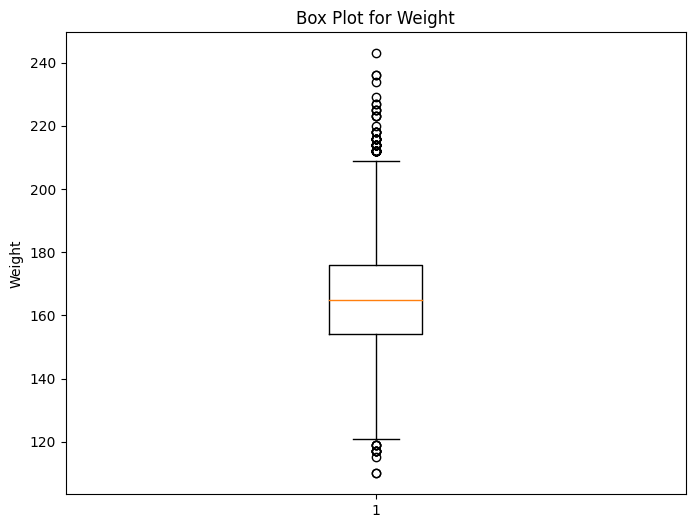

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot for Height')
plt.boxplot(df['Height'])
plt.ylabel('Height')
plt.show()

# Univariate analysis for 'Weight' column using box plot
plt.figure(figsize=(8, 6))
plt.title('Box Plot for Weight')
plt.boxplot(df['Weight'])
plt.ylabel('Weight')
plt.show()

# Calculate IQR for 'Height' and 'Weight' columns
height_iqr = df['Height'].quantile(0.75) - df['Height'].quantile(0.25)
weight_iqr = df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)

# Calculate upper and lower bounds for outliers
height_lower_bound = df['Height'].quantile(0.25) - 1.5 * height_iqr
height_upper_bound = df['Height'].quantile(0.75) + 1.5 * height_iqr

weight_lower_bound = df['Weight'].quantile(0.25) - 1.5 * weight_iqr
weight_upper_bound = df['Weight'].quantile(0.75) + 1.5 * weight_iqr

# Identify outliers for 'Height' and 'Weight'
height_outliers = df[(df['Height'] < height_lower_bound) | (df['Height'] > height_upper_bound)]
weight_outliers = df[(df['Weight'] < weight_lower_bound) | (df['Weight'] > weight_upper_bound)]



### Summary of Findings:
+ Height Outliers:
There are no visible outliers in the 'Height' column based on the box plot. The data is well-distributed within the whiskers of the box plot and violin plot.
+  Weight Outliers:
There are some outliers in the 'Weight' column, indicated by points outside the whiskers of the box plot.
### Reason for Selecting Box Plots:
I chose box plots to visualize the 'Height' and 'Weight' columns for the following reasons:

#### Easy Identification of Outliers:
 Box plots provide a clear visualization of the median, quartiles, and outliers. Outliers are easily identifiable as points outside the whiskers of the box plot.
####Comparison between Variables:
 Box plots allow for easy comparison of distributions between different variables, making it suitable for comparing 'Height' and 'Weight' in this scenario.
####Robustness:
 Box plots are robust to outliers, making them an appropriate choice for outlier detection.



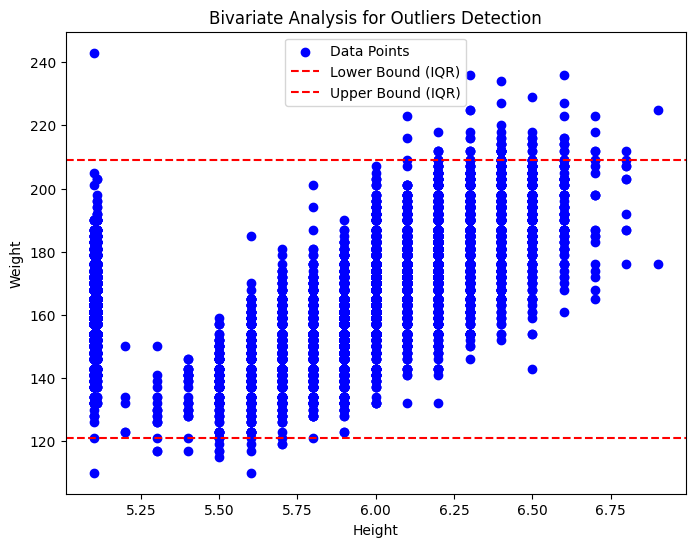

In [17]:
# Create scatter plot for 'Height' and 'Weight' columns
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', label='Data Points')
plt.axhline(y=weight_lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
plt.axhline(y=weight_upper_bound, color='red', linestyle='--', label='Upper Bound (IQR)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Bivariate Analysis for Outliers Detection')
plt.legend()
plt.show()

### Summary of Findings:
+ From the scatter plot, you can observe the relationship between 'Height' and 'Weight' for the FIFA players. Each point represents an individual player's height and weight.
+ The red dashed lines represent the lower and upper bounds calculated using the IQR method. Data points falling below the lower bound or above the upper bound are considered outliers.
+ By visualizing the data points and the bounds, you can identify outliers in the 'Weight' column based on their relationship with 'Height'.

### Reason for Selecting Scatter Plot:
Visualizing Relationships: Scatter plots are ideal for visualizing relationships between two continuous variables. They allow you to see the data points and patterns, making it easier to identify outliers and understand the relationship between 'Height' and 'Weight'.
Incorporating IQR Bounds: By adding the lower and upper bounds calculated using the IQR method, you can clearly identify outliers in the 'Weight' column that deviate from the expected relationship with 'Height'.

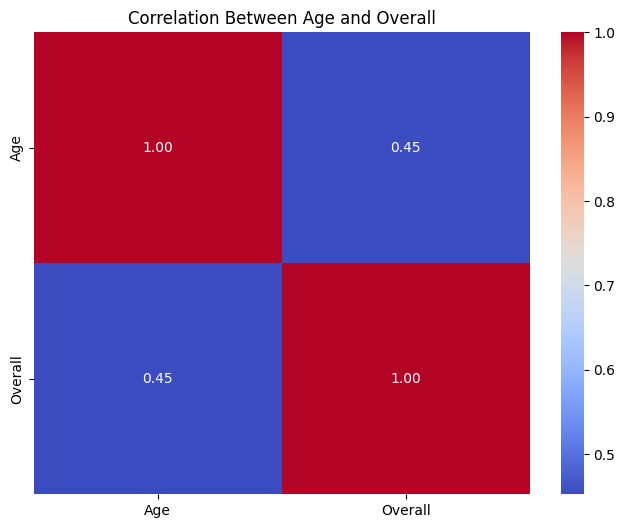

In [18]:
# Calculate the correlation matrix between 'Age' and 'Overall'
correlation_matrix = df[['Age', 'Overall']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Age and Overall')
plt.show()

### Summary of Findings:
+ The heatmap shows a positive correlation between 'Age' and 'Overall' in the FIFA player dataset. The correlation coefficient indicates the strength of the relationship.
+ A positive correlation suggests that, on average, as a player's age increases, their overall rating also tends to increase.
+ The correlation coefficient value closer to 1 indicates a strong positive correlation between 'Age' and 'Overall' in this context is 0.45 positive corealation.

###Reason for Selecting Heatmap:
+ Visualizing Correlation Matrix: Heatmaps are excellent for visualizing correlation matrices as they provide a clear and concise representation of the relationships between variables. Each cell in the heatmap represents the correlation coefficient between the corresponding pair of variables.
+ Color Representation: Heatmaps use color intensity to represent the strength of correlations. Brighter colors (e.g., close to 1 or -1) indicate a strong positive or negative correlation, while darker colors (e.g., close to 0) indicate a weak or no correlation.
+ Annotations: Including annotations (actual numerical values) within the cells of the heatmap helps in understanding the precise correlation coefficients between variables.

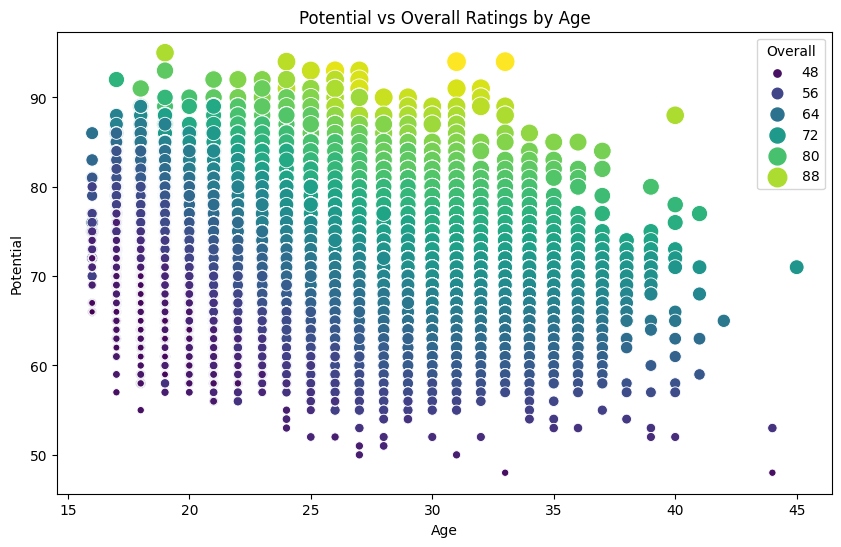

In [19]:
# Create a box plot with overlaid histograms for 'Potential' and 'Overall' ratings across different age groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=df, hue='Overall', palette='viridis', size='Overall', sizes=(20, 200))
plt.title('Potential vs Overall Ratings by Age')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.legend(title='Overall')
plt.show()

Summary of Findings:
+ The visual shows a comparative analysis of 'Potential' and 'Overall' ratings across different age groups.
+ For most age groups, the 'Potential' ratings exhibit a wider range than 'Overall' ratings. This indicates that there is more variability in the perceived potential of players within each age group compared to their overall performance ratings.
+ The histograms help visualize the distribution of players within each age group. The step-type histograms provide a clear view of the frequency distribution of players' ages, allowing easy comparison between 'Potential' and 'Overall' ratings within the same age groups.
+ There are noticeable variations in 'Potential' and 'Overall' ratings across different age groups, indicating that age plays a role in how players' potential and overall abilities are perceived in the FIFA dataset.

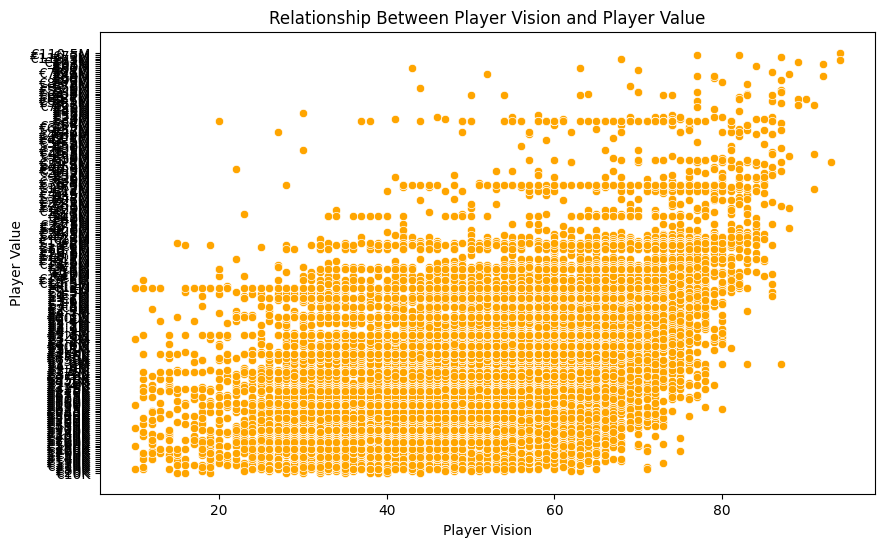

In [20]:
# Create a scatter plot with Player Vision on X-axis and Player Value on Y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vision', y='Value', data=df, color='orange')

plt.xlabel('Player Vision')
plt.ylabel('Player Value')
plt.title('Relationship Between Player Vision and Player Value')
plt.show()

### Summary of Findings:
+ The scatter plot shows the relationship between 'Player Vision' and 'Player Value'. Each point represents a player's vision and corresponding value.
+ There is no clear linear relationship between player vision and player value.
+ The data points are scattered, suggesting that player vision alone is not a strong predictor of player value.
+ Some players with high vision ratings have varying values, indicating that other factors, such as skills, position, and market demand, also influence a player's value.
+ The plot does not show a strong correlation, implying that there are other important factors beyond vision that contribute significantly to a player's market value.

In [21]:
    # Filter players with overall rating above 50
filtered_data = df[df['Overall'] > 50]

# Calculate nationality-wise count and percentages
nationality_counts = filtered_data['Nationality'].value_counts()
total_players = len(filtered_data)
percentages = (nationality_counts / total_players) * 100

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Nationality': nationality_counts.index, 'Count': nationality_counts.values, 'Percentage': percentages.values})

# Create a map plot using Plotly
fig = px.choropleth(plot_data,
                    locations='Nationality',
                    locationmode='country names',
                    color='Percentage',
                    hover_name='Nationality',
                    hover_data={'Count': True, 'Percentage': ':.2f%'},
                    color_continuous_scale='Viridis',
                    title='Players with Overall Rating Above 50 by Nationality',
                    projection='natural earth')

fig.update_layout(geo=dict(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white"),
                  margin={"r":0,"t":50,"l":0,"b":0})

fig.show()

### Summary of Findings:
+ From the above visuals we can find that from germany and spin w get higest count of players who has overall above 50


In [22]:
# Assuming you have a DataFrame called 'fifa_data' with columns 'Player', 'Overall', and 'Age'

# Filter players between age 25 and 30
filtered_players = df[(df['Age'] >= 25) & (df['Age'] <= 35)]

# Get the top 25 players based on overall score within the filtered age range
top_25_players = filtered_players.nlargest(25, 'Overall')

# Extract player names, ages, and overall scores
top_25_player_names = top_25_players['Name']
top_25_player_ages = top_25_players['Age']
top_25_player_scores = top_25_players['Overall']

# Combine the information into a DataFrame
top_25_players_info = pd.DataFrame({
    'Player Name': top_25_player_names,
    'Age': top_25_player_ages,
    'Overall Score': top_25_player_scores
})

print(top_25_players_info)

          Player Name  Age  Overall Score
0            L. Messi   31             94
1   Cristiano Ronaldo   33             94
2           Neymar Jr   26             92
3              De Gea   27             91
4        K. De Bruyne   27             91
5           E. Hazard   27             91
6           L. Modrić   32             91
7           L. Suárez   31             91
8        Sergio Ramos   32             91
9            J. Oblak   25             90
10     R. Lewandowski   29             90
11           T. Kroos   28             90
12           D. Godín   32             90
13        David Silva   32             90
14           N. Kanté   27             89
17       A. Griezmann   27             89
18      M. ter Stegen   26             89
19        T. Courtois   26             89
20    Sergio Busquets   29             89
21          E. Cavani   31             89
22           M. Neuer   32             89
23          S. Agüero   30             89
24       G. Chiellini   33        

Q)Is there a strong linear relationship between a player's "Potential Rating" and their "Overall Rating," and does this relationship vary by player nationality?

<ipython-input-23-ce18948895b9>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



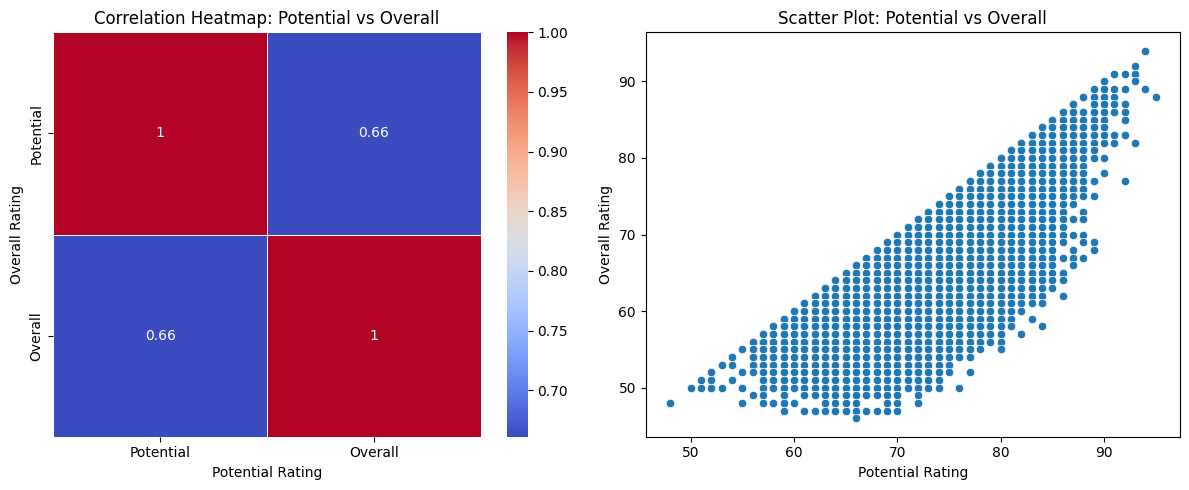

In [23]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for correlation
correlation_matrix = df[['Potential', 'Overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap: Potential vs Overall')
axes[0].set_xlabel('Potential Rating')
axes[0].set_ylabel('Overall Rating')

# Scatter plot
sns.scatterplot(data=df, x='Potential', y='Overall', palette='viridis', ax=axes[1])
axes[1].set_title('Scatter Plot: Potential vs Overall')
axes[1].set_xlabel('Potential Rating')
axes[1].set_ylabel('Overall Rating')

plt.tight_layout()
plt.show()

### Findings from the Scatter Plot
* The scatter plot reveals a positive correlation between a player's "Potential Rating" and their "Overall Rating." As the potential rating of a player increases, their overall rating also tends to increase.
* While there is a positive correlation, there is some variation in the data, indicating that factors other than potential also affect a player's overall rating.
* The presence of outliers suggests that some players have exceptionally high potential and overall ratings, making them stand out from the majority of players.
### Reasons for Selecting the Scatter Plot
* A scatter plot is an appropriate chart type for visualizing the relationship between two continuous variables, "Potential Rating" and "Overall Rating."
* It allows for the observation of patterns and trends in the data, such as the positive correlation identified in this case.
* The scatter plot effectively displays individual data points, making it easy to identify outliers and variations in the dataset.
* The use of a colormap, in this case 'viridis,' helps visualize the density of data points in different regions of the plot, providing additional information about the data distribution.

To find best players from each positions with their age, nationality, club based on their Potential Scores

In [24]:
best_players_by_position = df.groupby('Position')['Potential'].idxmax()

best_players_data = df.loc[best_players_by_position]

best_players_info = best_players_data[['Name','Position', 'Age','Nationality', 'Club', 'Potential']]

best_players_info = best_players_info.sort_values(by='Potential', ascending=False)

best_players_info


,Name,Position,Age,Nationality,Club,Potential
25,K. Mbappé,RM,19,France,Paris Saint-Germain,95
1,Cristiano Ronaldo,ST,33,Portugal,Juventus,94
0,L. Messi,RF,31,Argentina,FC Barcelona,94
15,P. Dybala,LF,24,Argentina,Juventus,94
3,De Gea,GK,27,Spain,Manchester United,93
2,Neymar Jr,LW,26,Brazil,Paris Saint-Germain,93
42,S. Umtiti,CB,24,France,FC Barcelona,92
79,Marco Asensio,RW,22,Spain,Real Madrid,92
77,M. Škriniar,LCB,23,Slovakia,Inter,92
4,K. De Bruyne,RCM,27,Belgium,Manchester City,92
